In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Bank Customer Churn Prediction.csv')
#df.dtypes
one_hot_country = pd.get_dummies(df.country, prefix='country')
one_hot_gender = pd.get_dummies(df.gender, prefix='gender')
df = df.drop(["country","gender"],axis=1)
df = pd.concat([df, one_hot_country, one_hot_gender], axis=1)

df = df.drop(['customer_id'], axis='columns')
X = df.drop(['churn'], axis='columns')
y = df['churn']
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input



model = Sequential([
Input(shape=(X_train.shape[1],)),
Dense(100, activation="relu"),
Dense(2, activation="softmax")
])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,602 (6.26 KB)

 Trainable params: 1,602 (6.26 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4797 - val_loss: 0.4776
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.4490 - val_loss: 0.4551
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 0.4334 - val_loss: 0.4447
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.4085 - val_loss: 0.4356
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.4224 - val_loss: 0.4354
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.4068 - val_loss: 0.4077
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.3742 - val_loss: 0.4025
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 0.3790 - val_loss: 0.3906
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 0.3749 - val_loss: 0.3865
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.3519 - val_loss: 0.3791
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 0.3412 - val_loss: 0.3783
Epoch 12/100
200/200 

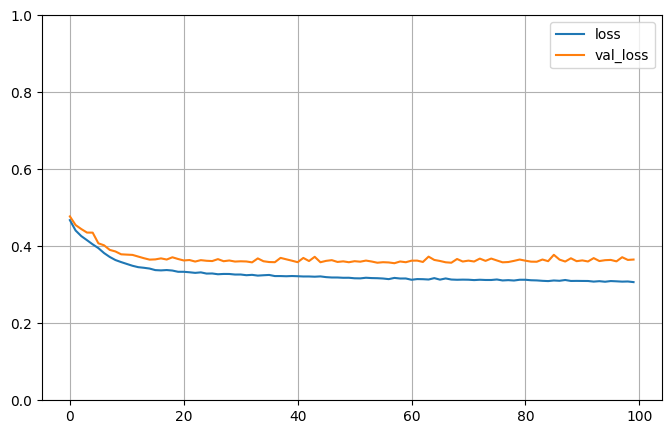

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [13]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(p) for p in y_pred]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
[[1534   42]
 [ 254  170]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1576
           1       0.80      0.40      0.53       424

    accuracy                           0.85      2000
   macro avg       0.83      0.69      0.72      2000
weighted avg       0.85      0.85      0.83      2000

